In [1]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
data = np.load('exp_io_data\CoupledPendula_mean_in7_out7_Tmax1.0_data.npz')
for key, val in data.items():
    print(key)
    exec(key +'=val')

xlist
exp_out_list


In [3]:
x=xlist
y=exp_out_list
#print(y)

In [4]:
x_in=x[:,0:7]
x_para=x[:,7:14]
print(x_in)
print(x_para)

[[0.24749702 0.02014035 0.8485794  ... 0.08696669 0.99749106 0.38496768]
 [0.75097805 0.60711515 0.67705935 ... 0.44351715 0.26912165 0.6546309 ]
 [0.5515969  0.85570264 0.12367398 ... 0.65876925 0.5144654  0.21687716]
 ...
 [0.42885804 0.77784693 0.23516494 ... 0.04689354 0.62893504 0.55456245]
 [0.20224023 0.34561175 0.6055104  ... 0.47257882 0.73187715 0.20602894]
 [0.8430058  0.8306561  0.3663333  ... 0.44167274 0.54337865 0.5084354 ]]
[[0.88139296 0.7579072  0.70741415 ... 0.20202214 0.9071052  0.7719516 ]
 [0.79979634 0.67036146 0.34607875 ... 0.4598763  0.6044103  0.8825798 ]
 [0.80389327 0.94342834 0.01652193 ... 0.74545115 0.7731646  0.6300963 ]
 ...
 [0.22442555 0.8744122  0.07718152 ... 0.7652486  0.48310757 0.2971735 ]
 [0.77770346 0.10846525 0.17362505 ... 0.7885187  0.4216227  0.8429448 ]
 [0.06028473 0.8461147  0.1516673  ... 0.3736133  0.5765584  0.7606528 ]]


In [5]:
print(x.shape)
print(y.shape)

(2000, 14)
(2, 30, 2000, 7, 2)


In [6]:
#y1=y[0:1,29:30,:,:,0:1]
print(y.shape)

F=3 #Fth frame
y2=y[0:1,:,0:1000,:,0:1]
y2_np=torch.from_numpy(y2)
y2=torch.transpose(y2_np,1,2)
print(y2.shape)
y3=y2.squeeze(0).squeeze(3)
print(y3.shape)
y_train=y3[:,F:F+1,:]
print(y_train.shape)

(2, 30, 2000, 7, 2)
torch.Size([1, 1000, 30, 7, 1])
torch.Size([1000, 30, 7])
torch.Size([1000, 1, 7])


In [7]:
x_train=x_in[0:1000,:]
x_train2=x[0:1000,:]
print(x_train.shape)
print(x)

(1000, 7)
[[0.24749702 0.02014035 0.8485794  ... 0.20202214 0.9071052  0.7719516 ]
 [0.75097805 0.60711515 0.67705935 ... 0.4598763  0.6044103  0.8825798 ]
 [0.5515969  0.85570264 0.12367398 ... 0.74545115 0.7731646  0.6300963 ]
 ...
 [0.42885804 0.77784693 0.23516494 ... 0.7652486  0.48310757 0.2971735 ]
 [0.20224023 0.34561175 0.6055104  ... 0.7885187  0.4216227  0.8429448 ]
 [0.8430058  0.8306561  0.3663333  ... 0.3736133  0.5765584  0.7606528 ]]


In [8]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x,activation="RELU"):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = x+torch.sigmoid(self.layer1(x))
        x = x+torch.sigmoid(self.layer2(x))
        x = x+torch.sigmoid(self.layer3(x))
        #x = x+torch.sigmoid(self.layer4(x))
        #x = x+torch.sigmoid(self.layer5(x))
        x = self.layer4(x)
        #x = F.relu(self.layer4(x))
        #x = F.relu(self.layer5(x))
        #x = torch.sigmoid(self.layer6(x))
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [9]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x,activation="RELU"):
        
        if activation=="RELU":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+0.1*(self.layer1(x))
            x = x+0.1*(self.layer2(x))
            x = x+0.1*(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))
        if activation=="SIG":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+torch.sigmoid(self.layer1(x))
            x = x+torch.sigmoid(self.layer2(x))
            x = x+torch.sigmoid(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))            
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [10]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([14, 14])


In [11]:
x_data=torch.tensor(x_train2)
input = x_data
out = net(input,"SIG")
print(out)
print(out.shape)

tensor([[ 1.3453, -1.1933,  1.6346,  ..., -0.7817,  0.7848, -0.9477],
        [ 1.4384, -1.0622,  1.6356,  ..., -0.5640,  0.8094, -0.8017],
        [ 1.5630, -1.2627,  1.7736,  ..., -0.6285,  0.9823, -0.8474],
        ...,
        [ 1.5954, -1.1197,  1.6202,  ..., -0.7170,  0.8374, -0.6649],
        [ 1.4750, -1.2013,  1.5842,  ..., -0.3928,  0.8618, -0.6191],
        [ 1.4616, -1.1982,  1.6997,  ..., -0.4576,  0.9178, -0.7278]],
       grad_fn=<AddmmBackward>)
torch.Size([1000, 7])


In [12]:
net.zero_grad()
out.backward(torch.randn(1000,7))

In [13]:
target=y_train
target_new=target.view(1000,7)
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)

torch.Size([1000, 7])
tensor(1.5381, grad_fn=<MseLossBackward>)


In [14]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-09, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)


tensor(0.5142, grad_fn=<MseLossBackward>)
tensor(0.4862, grad_fn=<MseLossBackward>)
tensor(0.4682, grad_fn=<MseLossBackward>)
tensor(0.4573, grad_fn=<MseLossBackward>)
tensor(0.4509, grad_fn=<MseLossBackward>)
tensor(0.4467, grad_fn=<MseLossBackward>)
tensor(0.4431, grad_fn=<MseLossBackward>)
tensor(0.4394, grad_fn=<MseLossBackward>)
tensor(0.4351, grad_fn=<MseLossBackward>)
tensor(0.4302, grad_fn=<MseLossBackward>)
tensor(0.4251, grad_fn=<MseLossBackward>)
tensor(0.4199, grad_fn=<MseLossBackward>)
tensor(0.4149, grad_fn=<MseLossBackward>)
tensor(0.4103, grad_fn=<MseLossBackward>)
tensor(0.4062, grad_fn=<MseLossBackward>)
tensor(0.4024, grad_fn=<MseLossBackward>)
tensor(0.3989, grad_fn=<MseLossBackward>)
tensor(0.3957, grad_fn=<MseLossBackward>)
tensor(0.3925, grad_fn=<MseLossBackward>)
tensor(0.3894, grad_fn=<MseLossBackward>)
tensor(0.3864, grad_fn=<MseLossBackward>)
tensor(0.3833, grad_fn=<MseLossBackward>)
tensor(0.3803, grad_fn=<MseLossBackward>)
tensor(0.3774, grad_fn=<MseLossBac

In [15]:
x_test=x[1000:2000,:]
print(x_test.shape)
y1=y[0:1,:,1000:2000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y1_np=torch.from_numpy(y1)
y1=torch.transpose(y1_np,1,2)

(1000, 14)


In [16]:
y4=y1.squeeze(0).squeeze(3)
print(y4.shape)

y_test=y4[:,F:F+1,:]
print(y_test.shape)

torch.Size([1000, 30, 7])
torch.Size([1000, 1, 7])


In [17]:
x_test=torch.tensor(x_test)
test_out=net(x_test)
#LOSS = criterion(test_out, y_test)
print(test_out)
print(y_test)
y_test_new=torch.transpose(y_test,1,2).squeeze(2)
test_loss=criterion(y_test_new,test_out)
print(test_loss)

tensor([[ 0.1947,  0.1443,  0.1893,  ...,  0.0851, -0.2033,  0.0825],
        [ 0.0024,  0.2153,  0.1854,  ..., -0.1133,  0.1972,  0.0648],
        [ 0.1164,  0.0427, -0.1830,  ...,  0.0734,  0.1667, -0.0143],
        ...,
        [ 0.0434,  0.1309, -0.0953,  ..., -0.1251,  0.0958,  0.0866],
        [-0.1030, -0.0542,  0.0577,  ...,  0.0506,  0.1512, -0.0866],
        [ 0.1970,  0.1519, -0.0459,  ...,  0.0206,  0.0485,  0.0589]],
       grad_fn=<AddmmBackward>)
tensor([[[ 1.0156,  0.8782,  1.4612,  ...,  0.4263, -0.8337,  0.7200]],

        [[-0.0723,  1.1634,  1.2704,  ..., -0.8000,  0.8912,  0.1751]],

        [[ 0.2026, -0.0291, -1.3508,  ..., -0.0814,  0.4652, -0.5868]],

        ...,

        [[-0.0660,  0.3950, -0.6166,  ..., -0.9775,  0.1488,  0.1452]],

        [[-0.7266, -0.4590,  0.1064,  ..., -0.0728,  0.4242, -0.5727]],

        [[ 1.0307,  0.7102, -0.1088,  ..., -0.0030,  0.0755,  0.1411]]])
tensor(0.3398, grad_fn=<MseLossBackward>)


Text(0, 0.5, 'y_pred')

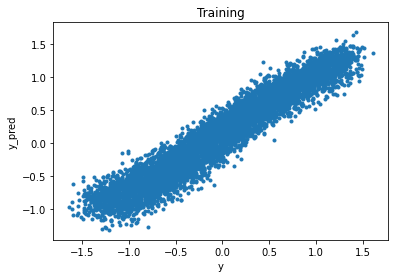

In [18]:
plt.plot(y_test_new.flatten(), 5*test_out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

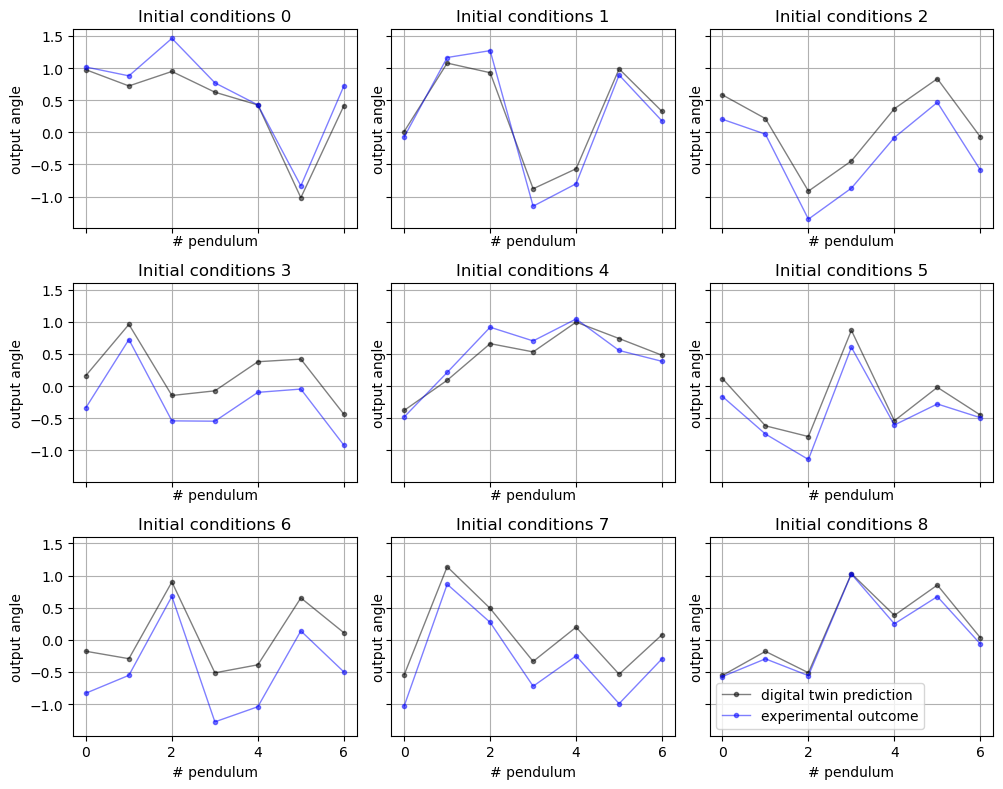

In [19]:
def plot_dt_exp_comparison(yexp, ypred):

    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = [10,8], dpi = 100, sharex=True, sharey=True)
    for i in range(9):
        plt.sca(axs.flatten()[i])
        plt.plot(ypred[i], '.-', lw = 1, c = 'k', alpha = 0.5, label = 'digital twin prediction')
        plt.plot(yexp[i], '.-', lw = 1, c = 'b', alpha = 0.5, label = 'experimental outcome')
        plt.xlabel('# pendulum')
        plt.ylabel('output angle')
        plt.title(f'Initial conditions {i}')
        plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig('img/coupled_pendula_dt_examples.png')
    plt.show()
    
plot_dt_exp_comparison(y_test_new,5*test_out.detach())

In [20]:

class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()

        self.layer1 = nn.Linear(14, 120)
        self.layer2 = nn.Linear(120, 120)
        self.layer3 = nn.Linear(120, 120)
        self.layer4 = nn.Linear(120, 84)
        self.layer5 = nn.Linear(84, 42)
        self.layer6 = nn.Linear(42, 7)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.layer1(x))
        x = x+F.relu(self.layer2(x))
        x = x+F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.tanh(self.layer5(x))
        x = F.relu(self.layer6(x))
        return x


net2 = Net2()
print(net2)

Net2(
  (layer1): Linear(in_features=14, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=120, bias=True)
  (layer3): Linear(in_features=120, out_features=120, bias=True)
  (layer4): Linear(in_features=120, out_features=84, bias=True)
  (layer5): Linear(in_features=84, out_features=42, bias=True)
  (layer6): Linear(in_features=42, out_features=7, bias=True)
)


params2 = list(net2.parameters())
print(len(params2))
print(params2[0].size())

In [21]:
x_data=torch.tensor(x)
input = x_data
out = net2(input)
print(out)
print(out.shape)

AttributeError: 'int' object has no attribute 'relu'

In [ ]:
target=y1[0:1000,:,:]
target_new=target.view(1000,7)

In [ ]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)
